In [57]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os, sys
os.environ["TOOLBOX_PATH"] = "/home/blevac/misc/HW/bart-0.6.00"  ## change to YOUR path
sys.path.append("/home/blevac/misc/HW/bart-0.6.00/python")        ## change to YOUR path
from bart import bart
from math import floor, ceil

In [66]:
def Cart2D_traj_gen(TRs, ETL, N_RO, ro_dir = 'y', ordering='interleave'):
    # ordering = 'linear', 'center_out', 'interleave' 
    if ro_dir == 'x':
        base_traj = bart(1, 'traj -x '+str(N_RO)+' -y '+str(ETL*TRs)).real[...]
        out_traj = np.zeros((3, TRs, N_RO, ETL))
        
        if ordering == 'linear':
            for i in range(TRs):
                out_traj[:, i, :, :] = base_traj[:,:,i*ETL:(i+1)*ETL]
        if ordering == 'interleave':
            for i in range(TRs):
                out_traj[:, i, :, :] = base_traj[:,:,i::TRs]
    
    if ro_dir == 'y':
        base_traj = bart(1, 'traj -x '+str(ETL*TRs)+' -y '+str(N_RO)).real[...]
        out_traj = np.zeros((3, TRs, ETL, N_RO))
        
        if ordering == 'linear':
            for i in range(TRs):
                out_traj[:, i, :, :] = base_traj[:,i*ETL:(i+1)*ETL,:]

        if ordering == 'interleave':
            for i in range(TRs):
                out_traj[:, i, :, :] = base_traj[:,i::TRs,:]

        if ordering == 'center_out':
            for i in range(TRs):
                if i<=int(TRs/2):
                    out_traj[:,i,:,:] = base_traj[:,i:int(ETL*TRs/2):floor(TRs/2),:]
                else:
                    out_traj[:,i,:,:] = base_traj[:,int(ETL*TRs/2) + int(i-TRs/2):ETL*TRs:floor(TRs/2),:]


    return np.transpose(out_traj.reshape(3,TRs, ETL*N_RO), (-2,-1,0))[...,0:2]

In [70]:
TRs = 25
ETL = 16
N_RO = 395
ro_dir = 'y'

traj = Cart2D_traj_gen(TRs = TRs, ETL=ETL, N_RO=N_RO, ro_dir = ro_dir)

In [71]:
print(traj.shape)

(25, 6320, 2)


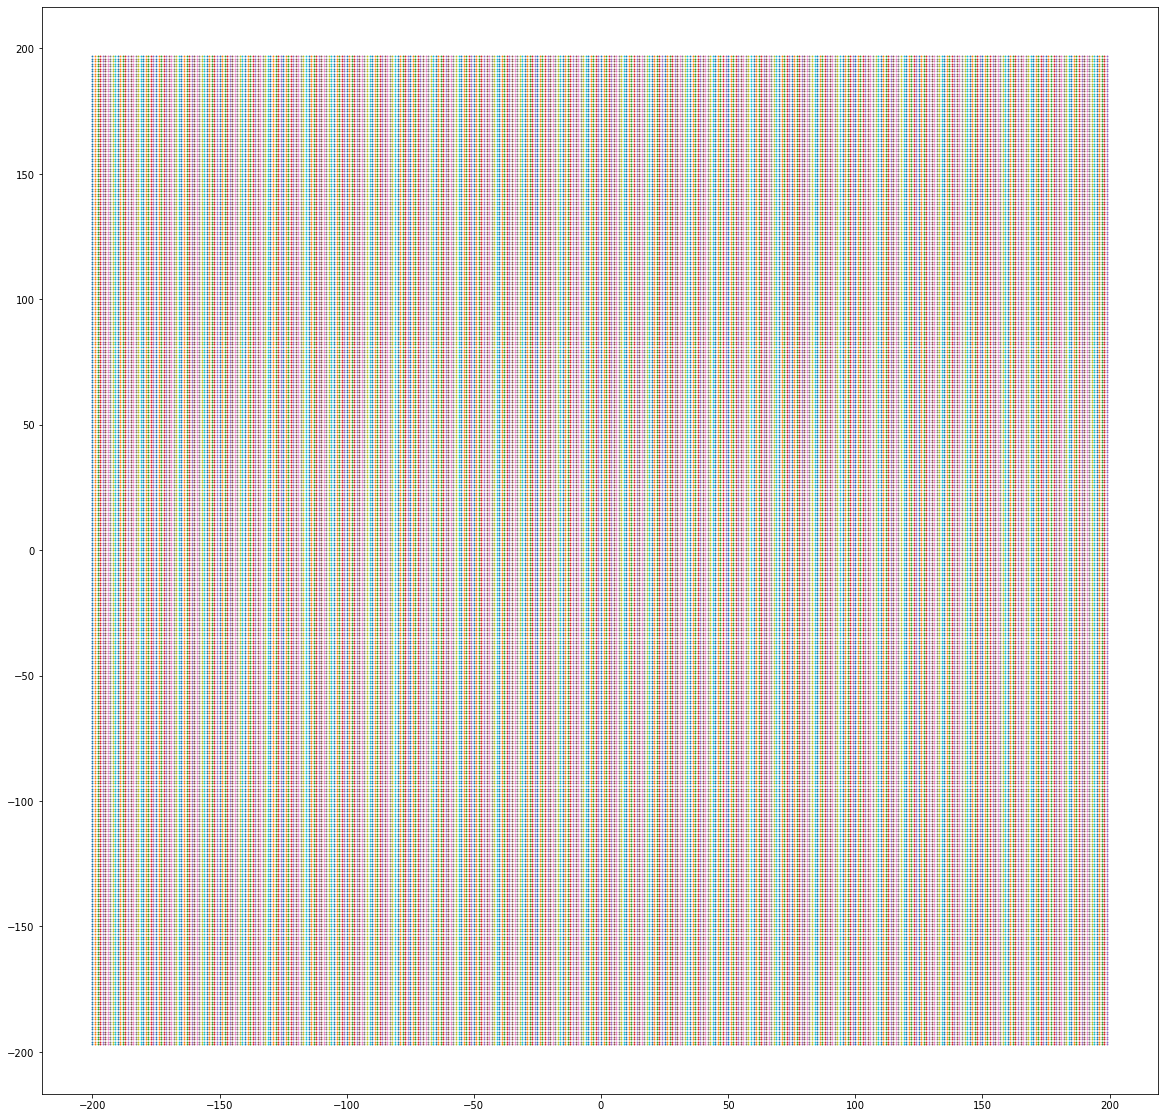

In [75]:
plt.figure(figsize=(20,20))
for i in range(TRs):
    plt.scatter(traj[i,:,0], traj[i,:,1], s = 0.75)